In [37]:
import pandas as pd 
import os
from itertools import islice
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform

In [38]:
# global variables
min_n, max_n = 5, 8
folder_path = '../SymbTr/txt/'

In [45]:
gen = os.walk('../SymbTr/txt')

paths = [(a, b, c) for a, b, c in gen]
paths = [ (a,c) for a,b,c in paths][0]
paths = [path for path in paths[1]]

makam_dict = {}

for path in paths[1]:
    makam = path.split('--')[0]
    if makam in makam_dict:
        makam_dict[makam] += 1
    else:
        makam_dict[makam] = 1

for m in makam_dict:
    if makam_dict[m] > 19:
        print(m, makam_dict[m])

In [46]:
makam_dict = {'rast', 'ussak'}
paths_new = {}

for makam in makam_dict:
    counter = 0
    paths_list = []
    for path in paths:
        if path.split('--')[0] == makam:
            paths_list.append(path)
            counter += 1
        if counter == 3:
            paths_new[makam] = paths_list
            break
paths_new

{'ussak': ['ussak--yuruksemai--yuruksemai--dila_cunem--mahmut_celebi.txt',
  'ussak--turku--sofyan--telgirafin_tellerine-2.txt',
  'ussak--turku--nimsofyan--ayva_cicek--.txt'],
 'rast': ['rast--turku--nimsofyan--sira_sira--.txt',
  'rast--sarki--musemmen--vuslatindan_gayri--haci_arif_bey.txt',
  'rast--sarki--senginsemai--sevda_ile_dillendi--munir_nurettin_selcuk.txt']}

In [5]:
def get_relative_intervals(list_of_tuples):
    lt = [(0, list_of_tuples[0][1])]
    for i in range(1, len(list_of_tuples)):
        lt.append((list_of_tuples[i][0] - list_of_tuples[i - 1][0], list_of_tuples[i][1]))
    return lt

In [6]:
def get_sublists(listt, num):
    lists = []
    for i in range(0, len(listt)-num +1):
        lists.append(list(islice(listt, i, i+num)))
    return lists

In [63]:
def separete_lists_from_list_of_tuples(list_of_notes):
    komas_list = []
    dur_list = []
    for komas, dur in list_of_notes:
        komas_list.append(komas)
        dur_list.append(dur)
    return komas_list, dur_list
    
def norm_durations(durations):
    norm = []
    max_dur = max([x[1] for x in durations])
    for tdur in durations:
        norm.append(int((max_dur / tdur[1] * tdur[0])*100)/100)
    return norm

In [61]:
def get_lists_of_notes_from_score(path, min_n, max_n):
    score = pd.read_csv(path, delimiter = '\t')
    data = score[['Payda', 'Pay', 'Koma53']]
    list_of_notes = []
    current_list = []

    for row in data.iterrows():
        k = row[1]['Koma53']
        p = row[1]['Pay']
        d = row[1]['Payda']

        if p == 0 or d == 0:
            continue
        if k == -1 and current_list:
            list_of_notes.append(current_list)
            current_list = []
        elif k == -1:
            continue
        else:
            current_list.append((k, (p, d)))

    if current_list:
        list_of_notes.append(current_list)
    
    dict_of_phrases = {}
    for i in range(min_n, max_n + 1):
        dict_of_phrases[i] = []
        for list_notes in list_of_notes:
            dict_of_phrases[i] = dict_of_phrases[i] + get_sublists(list_notes, i)
    return dict_of_phrases

The following code creates a dictionary storing a list of lists (for each phrase of lenght n in the range `n_min` to `n_max`) per each makam in the list of makams the variable `paths_new`.

In [64]:
dict_makams = {}

for makam, path_list in paths_new.items():
    print(makam)
    dict_makams[makam] = {}
    dict_makams[makam]['komas'] = {}
    dict_makams[makam]['durs'] = {}
    for path in path_list:
        print(path)
        path_with_folder = folder_path + path
        lists_of_notes = get_lists_of_notes_from_score(path_with_folder, min_n, max_n)
        dict_komas = {}
        dict_durs = {}
        dict_mat_komas = {}
        dict_mat_durs = {}

        for num, phrases in lists_of_notes.items():
            dict_komas[num] = []
            dict_durs[num] = []
            dict_mat_komas[num] = []
            dict_mat_durs[num] = []
            for phrase in phrases:
                list_komas, list_dur = separete_lists_from_list_of_tuples(phrase)
                dict_komas[num].append(list_komas)
                dict_durs[num].append(norm_durations(list_dur))

            if num not in dict_makams[makam]['komas']:
                dict_makams[makam]['komas'][num] = []
            dict_makams[makam]['komas'][num] = dict_makams[makam]['komas'][num] + dict_komas[num]
            if num not in dict_makams[makam]['durs']:
                dict_makams[makam]['durs'][num] = []
            dict_makams[makam]['durs'][num] = dict_makams[makam]['durs'][num] + dict_durs[num]


ussak
ussak--yuruksemai--yuruksemai--dila_cunem--mahmut_celebi.txt
ussak--turku--sofyan--telgirafin_tellerine-2.txt
ussak--turku--nimsofyan--ayva_cicek--.txt
rast
rast--turku--nimsofyan--sira_sira--.txt
rast--sarki--musemmen--vuslatindan_gayri--haci_arif_bey.txt
rast--sarki--senginsemai--sevda_ile_dillendi--munir_nurettin_selcuk.txt


This following loop, goes through the list of tracks per makam and renders the similarity matrix for all the phrases of size n (in the range `n_min` to `n_max`) for all the tracks of each makam.

<Figure size 432x288 with 0 Axes>

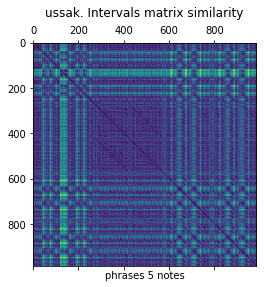

<Figure size 432x288 with 0 Axes>

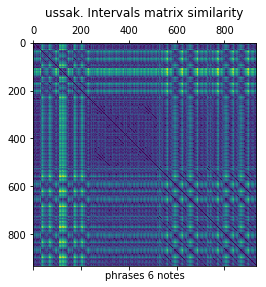

<Figure size 432x288 with 0 Axes>

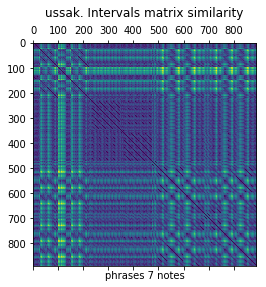

<Figure size 432x288 with 0 Axes>

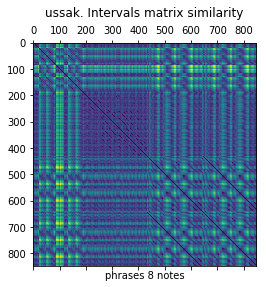

<Figure size 432x288 with 0 Axes>

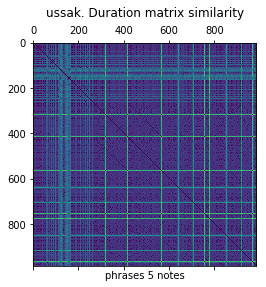

<Figure size 432x288 with 0 Axes>

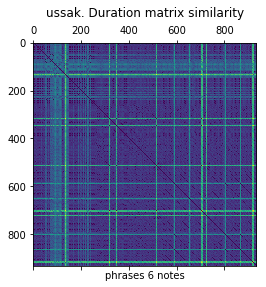

<Figure size 432x288 with 0 Axes>

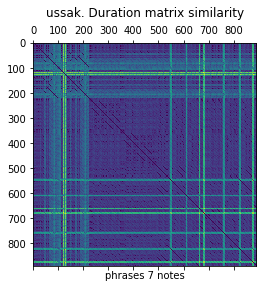

<Figure size 432x288 with 0 Axes>

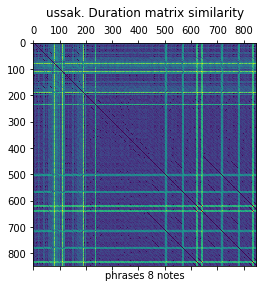

<Figure size 432x288 with 0 Axes>

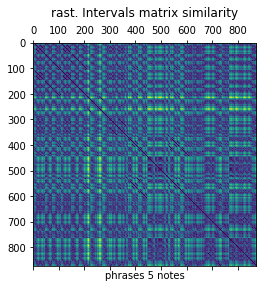

<Figure size 432x288 with 0 Axes>

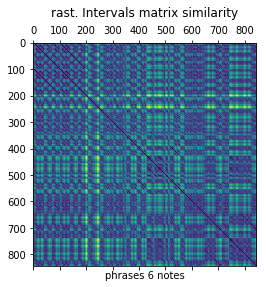

<Figure size 432x288 with 0 Axes>

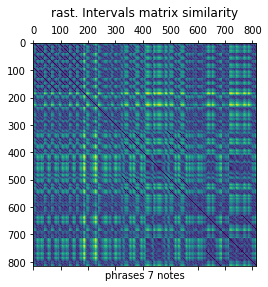

<Figure size 432x288 with 0 Axes>

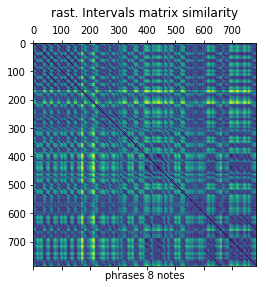

<Figure size 432x288 with 0 Axes>

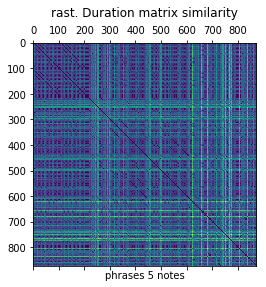

<Figure size 432x288 with 0 Axes>

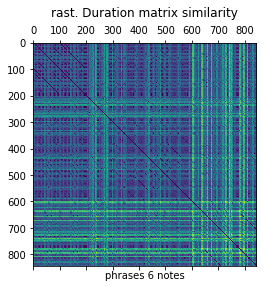

<Figure size 432x288 with 0 Axes>

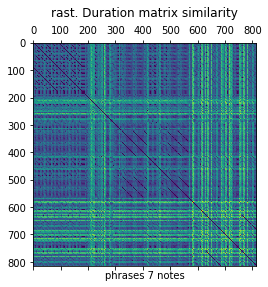

<Figure size 432x288 with 0 Axes>

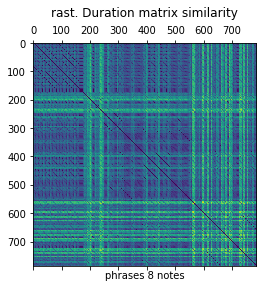

In [80]:
# Render similarity matrix for duration and intervals per n-size phrase per makam
for makam, dict_phrases in dict_makams.items():
    for t, num_dict in dict_phrases.items():
        for num, dict_p_n in num_dict.items():
            mat_dist = pdist(num_dict[num], 'euclidean')
        
            f1 = plt.figure(frameon=False)
            plt.matshow(squareform(mat_dist))
            name = 'Duration'
            if t == 'komas':
                name = 'Intervals'
            plt.title(makam + ". " + name + " matrix similarity", pad=15)
            plt.xlabel("phrases " + str(num) + " notes")
            plt.savefig(makam + ". " + name +'_matrix_'+ str(num) + '_notes.png')


The following code can be used to get similarities matrices for a single file for each group of phrases of size n in range n_min to n_max

<Figure size 432x288 with 0 Axes>

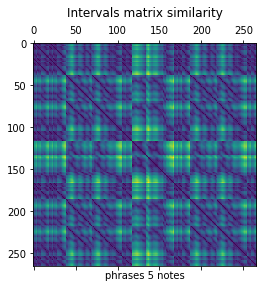

<Figure size 432x288 with 0 Axes>

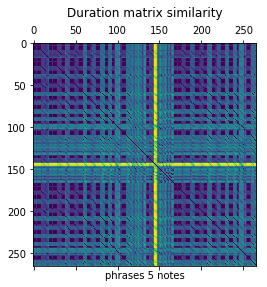

<Figure size 432x288 with 0 Axes>

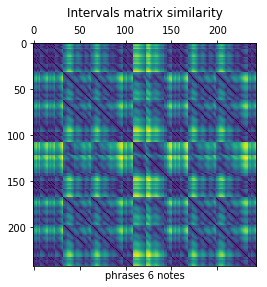

<Figure size 432x288 with 0 Axes>

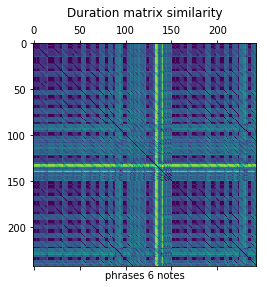

<Figure size 432x288 with 0 Axes>

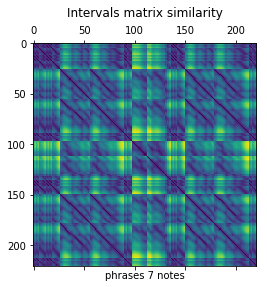

<Figure size 432x288 with 0 Axes>

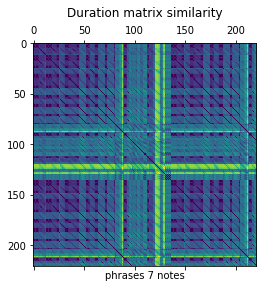

<Figure size 432x288 with 0 Axes>

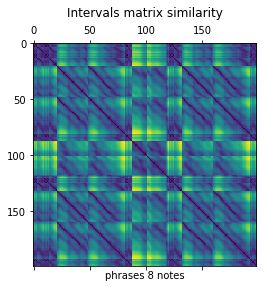

<Figure size 432x288 with 0 Axes>

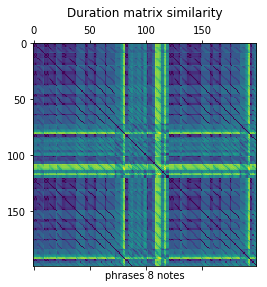

In [82]:
# Render similarity matrix for duration and intervals for 

path = folder_path + paths_new['ussak'][0]

lists_of_notes = get_lists_of_notes_from_score(path, min_n, max_n)
dict_komas = {}
dict_durs = {}
dict_mat_komas = {}
dict_mat_durs = {}

for num, phrases in lists_of_notes.items():
    dict_komas[num] = []
    dict_durs[num] = []
    dict_mat_komas[num] = []
    dict_mat_durs[num] = []
    for phrase in phrases:
        list_komas, list_dur = separete_lists_from_list_of_tuples(phrase)
        dict_komas[num].append(list_komas)
        dict_durs[num].append(norm_durations(list_dur))

    dict_mat_komas[num] = pdist(dict_komas[num], 'euclidean')
    dict_mat_durs[num] = pdist(dict_durs[num], 'euclidean')

    f1 = plt.figure(frameon=False)
    plt.matshow(squareform(dict_mat_komas[num]))
    plt.title("Intervals matrix similarity", pad=15)
    plt.xlabel("phrases " + str(num) + " notes")
    plt.savefig('Intervals_matrix_'+ str(num) + '_notes.png')
    
    f2 = plt.figure(frameon=False)
    plt.matshow(squareform(dict_mat_durs[num]))
    plt.title("Duration matrix similarity", pad=15)
    plt.xlabel("phrases " + str(num) + " notes")
    plt.savefig('Duration_matrix_'+ str(num) + '_notes.png')
        
        
